# Prueba Intertrimestral

**Nombre:**  María 
**Apellidos:**  Castilla Montes

**Tiempo de la prueba:** 2 horas  
**Asignatura:** Desarrollo de Aplicaciones para la Visualización de Datos  
**Fecha:** 16 de octubre de 2025  

## Instrucciones

- Escribe **código limpio y autoexplicativo**.  
- Se pueden utilizar **los materiales de clase**.  
- Se puede utilizar **internet** para búsqueda de dudas y documentación.  
- **No se puede utilizar ningún tipo de LLM** (ChatGPT, Copilot, Gemini, etc.).  
- **No se puede utilizar mensajería instantánea**.  
- Al finalizar, **sube tu notebook a GitHub** y envía el enlace del fichero en el siguiente formulario:  
[https://forms.office.com/e/LFVwu9z6uQ](https://forms.office.com/e/LFVwu9z6uQ)


## Dataset “Life Style Data”

El dataset contiene información sobre hábitos de vida (alimentación, sueño, ejercicio, consumo de tabaco o alcohol, etc.) y medidas de salud (IMC, presión arterial, etc.) para diferentes individuos.

Puedes descargarlo del repositorio de la asignatura y un .txt con la descripción de las variables.


## Inicialización de librerías

In [1]:
# Manipulación y análisis
import pandas as pd
import numpy as np
import scipy.stats as stats
from datetime import datetime
import os, io, re, sys, warnings
from pathlib import Path

# Visualización
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
# opcional:
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning / Estadística
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn import metrics
import statsmodels.api as sm

# Utilidades
from collections import Counter
import itertools
import requests, zipfile, json

warnings.filterwarnings("ignore")
pio.renderers.default = "notebook"

# Ejercicio 1 — Programación (2 puntos)

a) (0.6 pts) Crea una función imc(weight, height) que devuelva el índice de masa corporal (IMC), redondeado a dos decimales.



In [14]:
def imc(peso, altura):
  # Calcula el IMC y redondea a dos decimales
  valor_imc = round(peso / (altura ** 2), 2)
  return valor_imc

# Ejemplo de uso
peso_ejemplo = 70  # kg
altura_ejemplo = 1.75  # metros
resultado_imc = imc(peso_ejemplo, altura_ejemplo)
print(f"Tu IMC es: {resultado_imc}")


Tu IMC es: 22.86


b) (0.6 pts) Crea una función saludable(imcValue) que devuelva "Saludable" si el IMC está entre 18.5 y 24.9, "Bajo peso" si es menor de 18.5, o "Sobrepeso" si es mayor de 24.9.

In [15]:
def saludable(imcValue):
  if imcValue < 18.5:
    return "Bajo peso"
  elif 18.5 <= imcValue <= 24.9:
    return "Saludable"
  else:
    return "Sobrepeso"



c) (0.6 pts) Genera un DataFrame llamado imcData que contenga al menos 10 registros con las siguientes columnas:


*   peso (en kilogramos)

*   altura (en metros)

*   imc (calculado usando la función imc(weight, height) creada anteriormente)

Puedes generar los datos de peso y altura manualmente, mediante listas, o de forma aleatoria utilizando numpy (np.random.uniform o similar).

Añade una cuarta columna llamada categoria, cuyos valores provengan de la función saludable(imcValue).

Muestra las primeras filas del DataFrame resultante y comprueba que los tipos de datos son correctos.

In [18]:
import pandas as pd
import numpy as np


# Generación de datos
np.random.seed(42) # para reproducibilidad
n_registros = 12
datos = {
    'peso': np.random.uniform(50, 120, n_registros), # Peso entre 50 y 120 kg
    'altura': np.random.uniform(1.50, 1.95, n_registros) # Altura entre 1.50 y 1.95 m
}

# Creación del DataFrame
imcData = pd.DataFrame(datos)

# Cálculo de las columnas 'imc' y 'categoria'
imcData['imc'] = imc(imcData['peso'], imcData['altura'])
imcData['categoria'] = imcData['imc'].apply(saludable)

# Mostrar las primeras filas
print("Primeras filas del DataFrame imcData:")
print(imcData.head())

# Comprobar los tipos de datos
print("\nTipos de datos del DataFrame:")
print(imcData.dtypes)


Primeras filas del DataFrame imcData:
         peso    altura        imc  categoria
0   76.217808  1.874599  21.689004  Saludable
1  116.550001  1.595553  45.781501   Obesidad
2  101.239576  1.581821  40.460898   Obesidad
3   91.906094  1.582532  36.697738   Obesidad
4   60.921305  1.636909  22.736317  Saludable

Tipos de datos del DataFrame:
peso         float64
altura       float64
imc          float64
categoria     object
dtype: object


d) (0.2 pts) ¿Cómo podrías integrar ambas funciones dentro de una clase llamada HealthTools que calcule el IMC y clasifique automáticamente a partir de listas de pesos y alturas?

In [27]:

class HealthTools:
    def __init__(self):
        pass


    def imc(self, peso, altura):
        """Calcula la siguiente iteración usando la fórmula del mapa logístico."""
        imc=round(peso / (altura ** 2), 2)
        return imc

    def saludable(self,imcValue):
      if imcValue < 18.5:
        return "Bajo peso"
      elif 18.5 <= imcValue <= 24.9:
        return "Saludable"
      else:
        return "Sobrepeso"
    
    def calculoyclasificacion(self, peso,altura):
        imc=round(peso / (altura ** 2), 2)
        print(imc)
        if imc < 18.5:
            return "Bajo peso"
        elif 18.5 <= imcValue <= 24.9:
            return "Saludable"
        else:
            return "Sobrepeso"

## Ejercicio 2 — Exploración y visualización (3 puntos)

a) (0.75 pts) Carga el dataset desde el fichero CSV y guárdalo en un DataFrame llamado lifeStyleData. Muestra las 5 primeras filas, el número de filas y columnas.

In [72]:
lifeStyleData = pd.read_csv("Final_data.csv")   

lifeStyleData.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,...,cal_from_macros,pct_carbs,protein_per_kg,pct_HRR,pct_maxHR,cal_balance,lean_mass_kg,expected_burn,Burns Calories (per 30 min)_bc,Burns_Calories_Bin
0,34.91,Male,65.27,1.62,188.58,157.65,69.05,1.00,1080.90,Strength,...,2139.59,0.500432,1.624789,0.741237,0.835985,725.10,47.777394,685.1600,7.260425e+19,Medium
1,23.37,Female,56.41,1.55,179.43,131.75,73.18,1.37,1809.91,HIIT,...,1711.65,0.500850,1.514093,0.551247,0.734270,-232.91,40.809803,978.6184,1.020506e+20,High
2,33.20,Female,58.98,1.67,175.04,123.95,54.96,0.91,802.26,Cardio,...,1965.92,0.500610,1.663445,0.574534,0.708124,805.74,44.635580,654.5266,1.079607e+20,High
3,38.69,Female,93.78,1.70,191.21,155.10,50.07,1.10,1450.79,HIIT,...,1627.28,0.499533,0.862017,0.744155,0.811150,1206.21,63.007432,773.6300,8.987921e+19,High
4,45.09,Male,52.42,1.88,193.58,152.88,70.84,1.08,1166.40,Strength,...,2659.23,0.500581,2.538153,0.668405,0.789751,303.60,43.347504,711.4176,5.264685e+19,Low


b) (0.75 pts) Crea una función describeData(dataFrame) que devuelva para cada columna: tipo de dato, número de valores nulos y porcentaje de nulos.

In [73]:
def describeData(dataFrame):
    """
    Devuelve un resumen de cada columna con su tipo de dato,
    número de valores nulos y porcentaje de nulos.

    Returns:
        pd.DataFrame: Un DataFrame con la información de cada columna.
    """
    
    # Obtener el tipo de dato de cada columna
    tipos_de_dato = dataFrame.dtypes
    
    # Calcular el número de valores nulos
    valores_nulos = dataFrame.isnull().sum()
    
    # Calcular el porcentaje de valores nulos
    porcentaje_nulos = (dataFrame.isnull().sum() / len(dataFrame)) * 100
    
    # Crear un nuevo DataFrame para el resumen
    resumen = pd.DataFrame({
        'Tipo de Dato': tipos_de_dato,
        'Valores Nulos': valores_nulos,
        'Porcentaje Nulos': porcentaje_nulos
    })
    
    return resumen




c) (0.75 pts) Usa describeData(lifeStyleData) y comenta brevemente (2–3 líneas) qué variables parecen tener más valores faltantes.

In [74]:

# Llamar a la función y mostrar el resultado
resumen_df = describeData(lifeStyleData)
print(resumen_df)

                               Tipo de Dato  Valores Nulos  Porcentaje Nulos
Age                                 float64              0             0.000
Gender                               object              0             0.000
Weight (kg)                         float64              0             0.000
Height (m)                          float64              0             0.000
Max_BPM                             float64              1             0.005
Avg_BPM                             float64              1             0.005
Resting_BPM                         float64              0             0.000
Session_Duration (hours)            float64              0             0.000
Calories_Burned                     float64              0             0.000
Workout_Type                         object              0             0.000
Fat_Percentage                      float64              0             0.000
Water_Intake (liters)               float64              0             0.000

Las variables que tienen valores nulos son las siguientes:

In [75]:
print("\n## Filtrado & Orden & Renombrado")
df_filt = resumen_df[(resumen_df["Valores Nulos"] > 0) & (resumen_df["Porcentaje Nulos"]> 0)]
df_filt


## Filtrado & Orden & Renombrado


,Tipo de Dato,Valores Nulos,Porcentaje Nulos
Max_BPM,float64,1,0.005
Avg_BPM,float64,1,0.005
cholesterol_mg,float64,1,0.005


d) (0.75 pts) Realiza un gráfico que muestre las correlaciones entre variables numéricas. ¿Hay alguna correlación fuerte o inesperada?

In [76]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filtramos por variables numericas
data ={}

for i in range(len(lifeStyleData)):
    if df.iloc[i, 0] not in dic:
        dic[df.iloc[i, 0]]=[df.iloc[i, 2]]
        claves.append(df.iloc[i, 0])
    else:
        dic[df.iloc[i,0]].append(df.iloc[i, 2])

# Reemplaza esto con tus propios datos
data = {'variable_a': [1, 2, 3, 4, 5],
        'variable_b': [5, 4, 3, 2, 1],
        'variable_c': [2, 3, 5, 4, 6]}
df = pd.DataFrame(data)

# 1. Calcular la matriz de correlación
matriz_corr = df.corr()

# 2. Crear el mapa de calor
plt.figure(figsize=(8, 6)) # Ajusta el tamaño de la figura si es necesario
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Mapa de Calor de Correlación de Variables')
plt.show()


NameError: name 'dic' is not defined

In [82]:
df_limpio=lifeStyleData.dropna()

In [85]:


df_numerico = df_limpio.select_dtypes(include=[np.number])
del df_numerico['Weight (kg)']
del df_numerico['Height (m)']


matriz_corr = df_numerico.corr()

matriz_corr



,Age,Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,...,BMI_calc,cal_from_macros,pct_carbs,protein_per_kg,pct_HRR,pct_maxHR,cal_balance,lean_mass_kg,expected_burn,Burns Calories (per 30 min)_bc
Age,1.000000,-0.028832,0.039313,0.013328,-0.025400,-0.021436,-0.025170,0.037602,0.007121,-0.022504,...,-0.017095,0.052134,-0.004937,0.067398,0.044334,0.048205,-0.016032,-0.050621,-0.025907,-0.020993
Max_BPM,-0.028832,1.000000,-0.028090,0.035528,0.009771,0.003083,0.071815,0.041629,-0.038403,-0.003698,...,0.073347,-0.010602,-0.004318,-0.055933,-0.511919,-0.559491,0.043734,0.060057,0.003503,-0.029760
Avg_BPM,0.039313,-0.028090,1.000000,0.063100,0.018670,0.008175,0.008947,0.006089,-0.020787,-0.005488,...,0.028652,0.033086,-0.005054,0.018214,0.856717,0.841872,0.005004,0.011810,-0.005300,-0.058562
Resting_BPM,0.013328,0.035528,0.063100,1.000000,-0.017508,-0.001567,-0.042061,0.011732,-0.005416,-0.000753,...,-0.040762,0.042713,-0.016530,0.065880,-0.088424,0.035018,-0.024987,-0.030836,-0.004673,-0.000926
Session_Duration (hours),-0.025400,0.009771,0.018670,-0.017508,1.000000,0.814376,-0.034830,0.287787,0.637634,0.758463,...,-0.004168,0.010449,0.007831,-0.042991,0.017921,0.011044,-0.528579,0.025298,0.944114,-0.030752
Calories_Burned,-0.021436,0.003083,0.008175,-0.001567,0.814376,1.000000,-0.033845,0.262809,0.582711,0.697081,...,-0.004437,0.011672,0.009439,-0.036190,0.010682,0.006289,-0.660529,0.023299,0.773944,-0.013376
Fat_Percentage,-0.025170,0.071815,0.008947,-0.042061,-0.034830,-0.033845,1.000000,0.185222,-0.039452,-0.033297,...,0.902400,-0.012538,-0.003438,-0.603396,-0.020679,-0.030784,0.594539,0.659068,-0.018933,0.178864
Water_Intake (liters),0.037602,0.041629,0.006089,0.011732,0.287787,0.262809,0.185222,1.000000,0.241304,0.312330,...,0.214093,0.045211,0.006062,-0.281745,-0.019897,-0.018285,0.126393,0.435261,0.281397,0.072745
Workout_Frequency (days/week),0.007121,-0.038403,-0.020787,-0.005416,0.637634,0.582711,-0.039452,0.241304,1.000000,0.836111,...,0.000380,0.024459,-0.004353,-0.035653,0.002404,0.002469,-0.344252,0.024766,0.618921,0.011229
Experience_Level,-0.022504,-0.003698,-0.005488,-0.000753,0.758463,0.697081,-0.033297,0.312330,0.836111,1.000000,...,0.016334,0.031555,0.003435,-0.051135,0.004191,-0.000129,-0.419521,0.048769,0.735702,0.019213


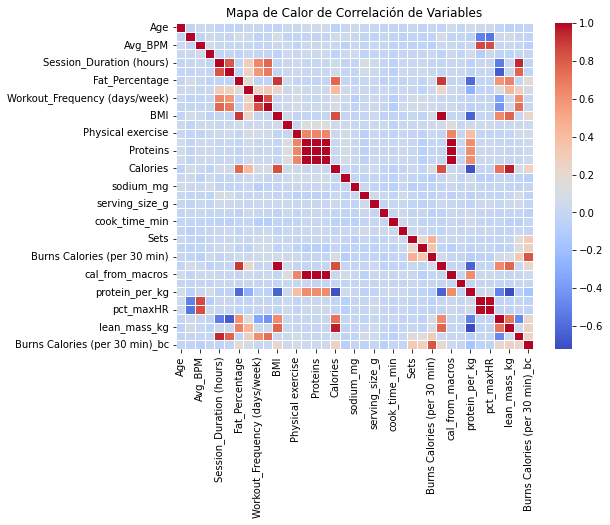

In [86]:

# 2. Crear el mapa de calor
plt.figure(figsize=(8, 6)) # Ajusta el tamaño de la figura si es necesario
sns.heatmap(matriz_corr, annot=False, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Mapa de Calor de Correlación de Variables')
plt.show()


   eN EL GRAFICO SE PUEDE OBSERVAR QUE LAS VARIABLESSUELEN IR RELACIONADAS POR EJMPLO  PROTEINASY CALORIAS. QUE PODEMOS ESPERAR QUE VAYAN RELACIONADOS OLAS CALORIAS DE LOS MACROS.

## Ejercicio 3 — Regresión básica (2 puntos)

Queremos predecir una variable de salud continua, por ejemplo bmi.

a) (0.25 pts) Define targetVar = "bmi" y selecciona 2–3 variables predictoras (por ejemplo sleepHours, activityLevel, calories). Guarda las columnas predictoras en X y la variable objetivo en y.

In [93]:
bmi_ordenar=matriz_corr.sort_values(by='BMI', ascending=False)
bmi_ordenar["BMI"]




BMI                               1.000000
BMI_calc                          1.000000
Fat_Percentage                    0.902399
Calories                          0.837504
lean_mass_kg                      0.769278
cal_balance                       0.632617
Water_Intake (liters)             0.214094
Burns Calories (per 30 min)_bc    0.211213
Max_BPM                           0.073351
Burns Calories (per 30 min)       0.062642
Daily meals frequency             0.058119
Avg_BPM                           0.028654
serving_size_g                    0.026333
Sets                              0.022311
Experience_Level                  0.016333
expected_burn                     0.012775
sugar_g                           0.000878
Workout_Frequency (days/week)     0.000379
cholesterol_mg                    0.000359
Proteins                         -0.003563
cal_from_macros                  -0.003740
Fats                             -0.003763
Carbs                            -0.003796
Session_Dur

Con esto llegamos a la conclusion de que las categorias a utilizar son Fat_Percentage                    0.902399
Calories                          0.837504
lean_mass_kg                      0.769278

In [123]:


dato={
    "BMI":df_numerico["BMI"],
    "Calories":df_numerico["Calories"],
    "lean_mass_kg":df_numerico["lean_mass_kg"],
    "Fat_Percentage":df_numerico["Fat_Percentage"]
    
}
premodelo=pd.DataFrame(dato)

In [131]:

X = premodelo.loc[:, premodelo.columns!= 'BMI']
y = premodelo['BMI']

b) (0.25 pts) Divide los datos en entrenamiento (70 %) y prueba (30 %).

In [132]:
import numpy as np

p_train = 0.70 # Porcentaje de train.

premodelo['is_train'] = np.random.uniform(0, 1, len(premodelo)) <= p_train
train, test = premodelo[premodelo['is_train']==True], premodelo[premodelo['is_train']==False]
premodelo = premodelo.drop('is_train', 1)

print("Ejemplos usados para entrenar: ", len(train))
print("Ejemplos usados para test: ", len(test))

Ejemplos usados para entrenar:  13962
Ejemplos usados para test:  6035


In [142]:
X_train = train.loc[:, train.columns!= 'BMI']
Y_train = train['BMI']
X_test = test.loc[:, test.columns!= 'BMI']
Y_test = test['BMI']

c) (0.75 pts) Entrena un modelo de regresión lineal (LinearRegression) y calcula el R² y el MSE.

In [139]:
modelo = LinearRegression()

# Entrena el modelo con tus datos
modelo.fit(X_train, Y_train)
predicciones = modelo.predict(X_test)


In [143]:
print(f"Coeficiente (pendiente): {modelo.coef_}")
print(f"Intersección (ordenada): {modelo.intercept_}")
print(f"Puntuación R²: {modelo.score(X_test, Y_test)}")


Coeficiente (pendiente): [0.00267336 0.06672106 0.87479221 0.        ]
Intersección (ordenada): -6.938557628687125
Puntuación R²: 0.869709555621085


d) (0.75 pts) Entrena un RandomForestRegressor con los mismos datos y compara resultados. ¿Cuál tiene mejor rendimiento?

In [150]:
from sklearn.ensemble import RandomForestRegressor
model2 = RandomForestRegressor(max_depth=3, random_state=0)
model2.fit(X_train, Y_train)
predicciones = model2.predict(X_test)

In [153]:


print(f"Puntuación R²: {model2.score(X_test, Y_test)}")


Puntuación R²: 0.8601207861477889


## Ejercicio 4 — Clasificación sencilla (2 puntos)

Crea una nueva variable binaria que indique si el IMC está dentro del rango saludable.

a) (0.25 pts) Crea una nueva columna bmiHealthy donde el valor sea 1 si bmi está entre 18.5 y 24.9, y 0 en caso contrario.

In [160]:
df_numerico['BMI Healthy'] = df.apply(lambda row: 1 if row['BMI'] >= 18.5 and row['BMI'] <= 24.9 else 0, axis=1)

df_numerico

,Age,Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,...,cal_from_macros,pct_carbs,protein_per_kg,pct_HRR,pct_maxHR,cal_balance,lean_mass_kg,expected_burn,Burns Calories (per 30 min)_bc,BMI Healthy
0,34.91,188.58,157.65,69.05,1.00,1080.90,26.800377,1.50,3.99,2.01,...,2139.59,0.500432,1.624789,0.741237,0.835985,725.10,47.777394,685.1600,7.260425e+19,1
1,23.37,179.43,131.75,73.18,1.37,1809.91,27.655021,1.90,4.00,2.01,...,1711.65,0.500850,1.514093,0.551247,0.734270,-232.91,40.809803,978.6184,1.020506e+20,1
2,33.20,175.04,123.95,54.96,0.91,802.26,24.320821,1.88,2.99,1.02,...,1965.92,0.500610,1.663445,0.574534,0.708124,805.74,44.635580,654.5266,1.079607e+20,1
3,38.69,191.21,155.10,50.07,1.10,1450.79,32.813572,2.50,3.99,1.99,...,1627.28,0.499533,0.862017,0.744155,0.811150,1206.21,63.007432,773.6300,8.987921e+19,0
4,45.09,193.58,152.88,70.84,1.08,1166.40,17.307319,2.91,4.00,2.00,...,2659.23,0.500581,2.538153,0.668405,0.789751,303.60,43.347504,711.4176,5.264685e+19,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,46.77,199.20,148.18,63.72,0.77,761.61,27.505498,2.99,3.02,1.00,...,1882.80,0.500000,0.954837,0.623413,0.743876,1865.39,71.269345,533.2558,7.924402e+19,0
19996,40.38,196.18,134.18,54.04,1.97,2303.13,26.180562,3.52,5.01,2.99,...,1205.47,0.496968,0.689060,0.563810,0.683964,173.87,65.049689,1310.6016,5.708474e+19,0
19997,50.31,163.34,157.92,61.65,1.36,1468.80,23.331802,2.81,4.02,2.00,...,1947.79,0.500280,2.105844,0.946701,0.966818,-43.80,35.420708,957.9568,9.101285e+19,0
19998,52.36,179.27,121.23,60.88,1.41,929.75,18.985868,1.59,3.02,1.00,...,1921.51,0.499940,2.190745,0.509756,0.676243,346.25,35.889260,928.4004,5.246436e+19,0


b) (0.75 pts) Entrena un modelo de regresión logística (LogisticRegression) para predecir bmiHealthy usando algunas variables de estilo de vida (por ejemplo sleepHours, activityLevel, calories).

In [166]:

datos={
    "BMIHealthy":df_numerico["BMI Healthy"],
    "Calories":df_numerico["Calories"],
    "lean_mass_kg":df_numerico["lean_mass_kg"],
    "Fat_Percentage":df_numerico["Fat_Percentage"]
    
}
premodelo2=pd.DataFrame(datos)

In [169]:
X = premodelo2.loc[:, premodelo2.columns!= 'BMIHealthy']
y = premodelo2['BMIHealthy']

In [170]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [172]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression(random_state=42)

In [174]:
 
model.fit(X_train, y_train)

# 4. Realizar predicciones
# Predecir los valores en el conjunto de prueba
y_pred = model.predict(X_test)

# 5. Evaluar el modelo
# Calcular la precisión del modelo
precision = accuracy_score(y_test, y_pred)

print(f"Precisión del modelo: {precision:.2f}")
# Salida: Precisión del modelo: 0.85 (ejemplo)

# 6. Interpretar los coeficientes (opcional)
# Se puede acceder a los coeficientes para interpretar la influencia de cada variable
print(f"Coeficientes: {model.coef_}")
print(f"Intercepto: {model.intercept_}")

Precisión del modelo: 0.59
Coeficientes: [[-0.00191126  0.05884739 -0.09173059]]
Intercepto: [2.55535169]


c) (0.25 pts) Calcula la exactitud (accuracy) del modelo y muestra la matriz de confusión.


In [175]:
precision = accuracy_score(y_test, y_pred)

print(f"Precisión del modelo: {precision:.2f}")
# Salida: Precisión del modelo: 0.85 (ejemplo)


Precisión del modelo: 0.59


d) (0.75 pts) Explica qué variable parece influir más según el modelo.

Las variables elegidas parecen no tener demasiada relacion con el BMI healthy. la precision del modelo es muy baja. el coefiiente con mayor valor absoluto es lea

## Ejercicio 5 — Conclusión (1 punto)

En un máximo de 300 palabras, resume:

*   Qué hábitos parecen tener mayor relación con el estado de salud.

*   Qué modelo fue más eficaz y por qué.

*   Qué podrías mejorar si tuvieras más tiempo o datos.



In [ ]:
vEMOS QUE TIENE BASTANT QUE VER LAS CALORIAS INGERIDAS CON EL NIVEL FISCO, sin embargo otras casi no aportan. Creoque seria necesario hacer más graficas para entender el comportamiento de las variables